<a href="https://colab.research.google.com/github/Edudeiko/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/Evgenii_Dudeiko_DSPT3_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

# 1st extract the data
exercise_data_url = 'https://raw.githubusercontent.com/Edudeiko/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'

In [0]:
import pandas as pd
exercise_data = pd.read_csv(exercise_data_url)

In [90]:
# Unnamed needs to be changed to unique id
exercise_data.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [91]:
# I have the exact count as 1200 (hypothetical) people" for assignment 
exercise_data.count()

Unnamed: 0       1200
age              1200
weight           1200
exercise_time    1200
dtype: int64

In [92]:
df = pd.read_csv(exercise_data_url)
print(df.shape)
df.head()

(1200, 4)


,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [93]:
# Assign the name to the unnamed colum
df.columns = ['unique_id', 'age', 'weight', 'exercise_time']
df.head()

,unique_id,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [94]:
# Looked through the raw data first, then ran the:
df.isna().sum()

unique_id        0
age              0
weight           0
exercise_time    0
dtype: int64

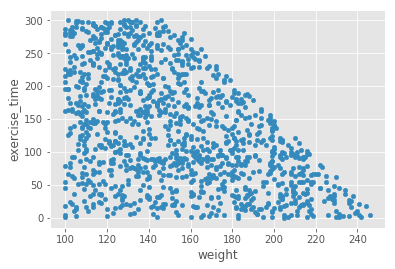

In [95]:
# That's a great example of those who spend more time doing exercise vs those who spend less time doing exercise
df.plot.scatter('weight', 'exercise_time');

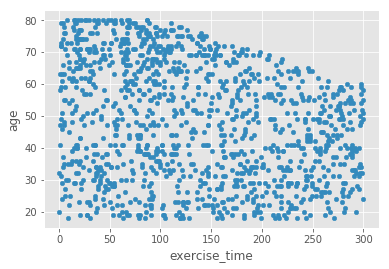

In [96]:
df.plot.scatter('exercise_time', 'age');

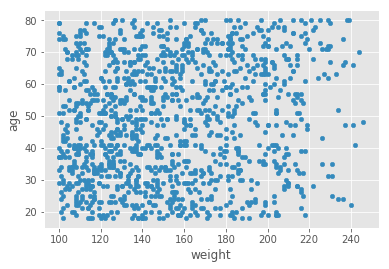

In [97]:
df.plot.scatter('weight', 'age');


In [0]:
from collections import namedtuple

In [100]:
# unique_id seems irrelevant for the next data analysis
df.drop(['unique_id'], axis=1, inplace=True)
df.head()

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


In [101]:
# Let's prepare for the crosstab analysis. 160 is where you can see a downfall on scatter plot 
df['normal-body-mass'] = df['weight'] <= 160
df.head()

,age,weight,exercise_time,normal-body-mass
0,44,118,192,True
1,41,161,35,False
2,46,128,220,True
3,39,216,57,False
4,28,116,182,True


In [102]:
# Same with the exercise time. 
df['good-exercise-time'] = df['exercise_time'] >= 250
df.head()

,age,weight,exercise_time,normal-body-mass,good-exercise-time
0,44,118,192,True,False
1,41,161,35,False,False
2,46,128,220,True,False
3,39,216,57,False,False
4,28,116,182,True,False


In [103]:
# I do not need the weight and exercise time for the next test. So instead of doing a copy, I decided to drop the columns
df.drop(['weight', 'exercise_time'], axis=1, inplace=True)
df.head()

,age,normal-body-mass,good-exercise-time
0,44,True,False
1,41,False,False
2,46,True,False
3,39,False,False
4,28,True,False


In [104]:
pd.crosstab(df['good-exercise-time'], df['age'])

age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
good-exercise-time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,19,22,14,16,19,19,15,15,9,11,22,23,20,14,17,22,25,17,13,11,22,16,14,28,5,11,17,7,10,19,11,15,8,18,15,7,9,19,14,20,12,16,11,21,14,19,23,15,16,21,20,28,19,27,18,19,20,18,16,13,14,15,19
True,1,1,3,2,0,2,2,4,6,5,2,3,1,5,3,4,4,4,2,4,3,5,8,4,3,2,4,3,3,3,5,7,5,5,5,5,5,5,3,4,3,6,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
pd.crosstab(df['normal-body-mass'], df['age'], normalize='columns')

age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
normal-body-mass,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,0.25,0.521739,0.352941,0.388889,0.315789,0.333333,0.352941,0.263158,0.2,0.4375,0.208333,0.307692,0.428571,0.315789,0.5,0.346154,0.206897,0.47619,0.466667,0.266667,0.24,0.380952,0.318182,0.28125,0.125,0.230769,0.380952,0.3,0.230769,0.636364,0.3125,0.272727,0.307692,0.434783,0.45,0.25,0.285714,0.291667,0.470588,0.416667,0.4,0.272727,0.538462,0.363636,0.333333,0.526316,0.391304,0.4,0.625,0.428571,0.6,0.357143,0.315789,0.481481,0.555556,0.684211,0.6,0.333333,0.5625,0.538462,0.571429,0.4,0.736842
True,0.75,0.478261,0.647059,0.611111,0.684211,0.666667,0.647059,0.736842,0.8,0.5625,0.791667,0.692308,0.571429,0.684211,0.5,0.653846,0.793103,0.52381,0.533333,0.733333,0.76,0.619048,0.681818,0.71875,0.875,0.769231,0.619048,0.7,0.769231,0.363636,0.6875,0.727273,0.692308,0.565217,0.55,0.75,0.714286,0.708333,0.529412,0.583333,0.6,0.727273,0.461538,0.636364,0.666667,0.473684,0.608696,0.6,0.375,0.571429,0.4,0.642857,0.684211,0.518519,0.444444,0.315789,0.4,0.666667,0.4375,0.461538,0.428571,0.6,0.263158


In [106]:
pd.crosstab(df['good-exercise-time'], df['normal-body-mass'])

normal-body-mass,False,True
good-exercise-time,,
False,465,577
True,3,155


In [107]:
df['good-exercise-time'].value_counts()

False    1042
True      158
Name: good-exercise-time, dtype: int64

In [108]:
df['normal-body-mass'].value_counts()

True     732
False    468
Name: normal-body-mass, dtype: int64

In [109]:
ct = pd.crosstab(df['good-exercise-time'], df['normal-body-mass'], normalize='columns')
ct

normal-body-mass,False,True
good-exercise-time,,
False,0.99359,0.788251
True,0.00641,0.211749


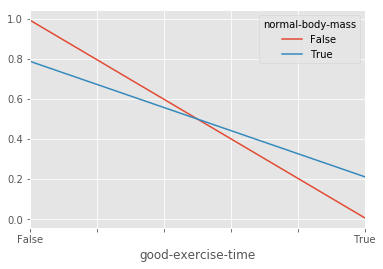

In [110]:
ct.plot();

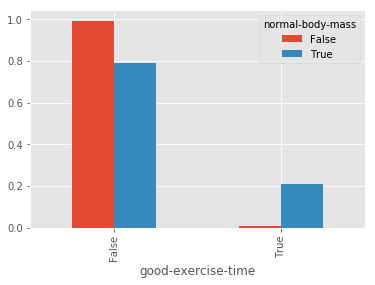

In [121]:
# Here we can see the exercise_time and weight doesn't show a strong 
ct.plot(kind='bar');

In [122]:
df.head()

,age,normal-body-mass,good-exercise-time
0,44,True,False
1,41,False,False
2,46,True,False
3,39,False,False
4,28,True,False


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


In [0]:
# Variable types in the data are Numbers
# Correlations are the relationship between the variables
# Real relationship is between weight and age, time of the excercise on the
# other hand doesn't make that much of the difference in
# correlation with either weight or age.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)